<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [49]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs # Dataset
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [10]:
url = "https://raw.githubusercontent.com/Evelyn0924/Aprendizaje-Automatico-CD/main/Datos/HeartDiseaseTrain-Test.csv"

df = pd.read_csv(url, sep=';')

# Mostrar las primeras filas
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [12]:
numeric_cols = [
    'age',
    'resting_blood_pressure',
    'cholestoral',
    'Max_heart_rate',
    'oldpeak'
]

df[numeric_cols].describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [15]:
X = df.drop(columns=['target'])
y = df['target']
X_encoded = pd.get_dummies(X, drop_first=True)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

pd.DataFrame(X_scaled, columns=X_encoded.columns).describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,fasting_blood_sugar_Lower than 120 mg/ml,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,...,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1025.000000,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03
mean,-3.431402e-16,-7.036106e-16,-3.466062e-18,-4.332578e-16,-2.426243e-16,1.802352e-16,-5.545699e-17,-4.159275e-17,-2.079637e-17,1.074479e-16,...,-7.625337e-17,4.679184e-17,3.032804e-17,3.812668e-17,0.000000,6.238912e-17,1.386425e-16,-2.946153e-17,6.065609e-17,-2.772850e-17
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,...,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00
min,-2.804866e+00,-2.148237e+00,-2.327054e+00,-3.397080e+00,-9.123291e-01,-1.511706e+00,-4.411788e-01,-6.190847e-01,-9.701999e-01,-2.387330e+00,...,-7.122871e-01,-9.421577e-01,-2.789495e-01,-5.318398e-01,-0.268655,-3.878051e-01,-1.137130e+00,-8.292302e-02,-2.580645e-01,-8.164966e-01
25%,-7.095548e-01,-6.632165e-01,-6.787242e-01,-7.442713e-01,-9.123291e-01,-1.511706e+00,-4.411788e-01,-6.190847e-01,-9.701999e-01,4.188779e-01,...,-7.122871e-01,-9.421577e-01,-2.789495e-01,-5.318398e-01,-0.268655,-3.878051e-01,-1.137130e+00,-8.292302e-02,-2.580645e-01,-8.164966e-01
50%,1.726817e-01,-9.205458e-02,-1.163527e-01,1.255019e-01,-2.311765e-01,6.615041e-01,-4.411788e-01,-6.190847e-01,-9.701999e-01,4.188779e-01,...,-7.122871e-01,-9.421577e-01,-2.789495e-01,-5.318398e-01,-0.268655,-3.878051e-01,8.794068e-01,-8.292302e-02,-2.580645e-01,-8.164966e-01
75%,7.240794e-01,4.791073e-01,5.623715e-01,7.343432e-01,6.202642e-01,6.615041e-01,-4.411788e-01,1.615288e+00,1.030715e+00,4.188779e-01,...,1.403928e+00,1.061393e+00,-2.789495e-01,-5.318398e-01,-0.268655,-3.878051e-01,8.794068e-01,-8.292302e-02,-2.580645e-01,1.224745e+00
max,2.488552e+00,3.906079e+00,6.166694e+00,2.299935e+00,4.366603e+00,6.615041e-01,2.266655e+00,1.615288e+00,1.030715e+00,4.188779e-01,...,1.403928e+00,1.061393e+00,3.584878e+00,1.880265e+00,3.722240,2.578615e+00,8.794068e-01,1.205938e+01,3.875000e+00,1.224745e+00



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    df['target'],
    test_size=0.2,
    random_state=49,
    stratify=df['target']
)

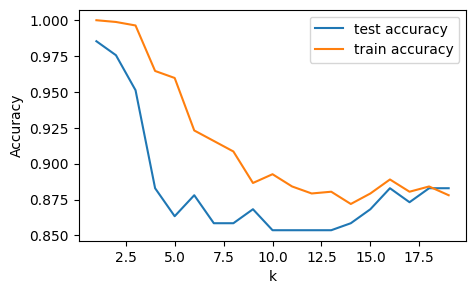

In [24]:
k_values = range(1, 20)
# Precisión de los modelos
precisions_test = []
precisions_train = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)

    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)

    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

plt.figure(figsize=(5, 3))
plt.plot(k_values, precisions_test, label="test accuracy")
plt.plot(k_values, precisions_train, label="train accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

Se entrenaron modelos kNN para valores de k entre 1 y 19 y se generó una gráfica que muestra la relación entre el valor de k y la precisión del modelo.
A partir de la gráfica obtenida, se observa que el valor de k=1 es el que maximiza la precisión en el conjunto de prueba, alcanzando una precisión cercana al 98%.
Por lo tanto, se selecciona k=1 como el número óptimo de vecinos para el algoritmo kNN bajo el criterio de máxima precisión.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [27]:
modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.99


In [28]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[100   0]
 [  3 102]]


In [29]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



El modelo kNN entrenado con k=1 alcanza un desempeño muy alto en el conjunto de prueba, con una precisión del 99%.
La matriz de confusión muestra que la mayoría de las observaciones fueron clasificadas correctamente, con solo tres errores en la clase positiva.
Las métricas de evaluación indican un equilibrio adecuado entre precisión y recall para ambas clases, lo que sugiere que el modelo es altamente efectivo para la tarea de clasificación planteada. Aunque el valor de k=1 puede inducir sobreajuste, en este caso el modelo generaliza adecuadamente sobre el conjunto de prueba, logrando métricas de desempeño muy elevadas.

---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [31]:
url = "https://raw.githubusercontent.com/Evelyn0924/Aprendizaje-Automatico-CD/main/Datos/train.csv"
df = pd.read_csv(url, sep=';')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [35]:
y = df['SalePrice']
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['SalePrice'])

In [38]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pd.DataFrame(X_scaled, columns=X.columns).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,0.000000,-8.455945e-17,4.075887e-16,-5.840077e-17,1.387018e-16,3.540547e-16,1.046347e-15,4.496860e-15,-3.406712e-17,-2.433366e-17,...,-1.216683e-17,5.596741e-17,3.041707e-17,-2.311697e-17,4.866731e-18,5.475072e-17,1.946692e-17,-2.676702e-17,7.543433e-17,3.567436e-14
std,1.000343,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.730865,-8.725628e-01,-2.227875e+00,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.744105e-01,-9.730182e-01,...,-2.212963e+00,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00
25%,-0.865432,-8.725628e-01,-4.564744e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-5.744105e-01,-9.730182e-01,...,-6.479160e-01,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-4.891101e-01,-6.144386e-01
50%,0.000000,-1.631095e-01,6.454645e-16,-1.040633e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-5.744105e-01,-1.319022e-01,...,3.284429e-02,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.191097e-01,1.387775e-01
75%,0.865432,3.098594e-01,4.065156e-01,1.087080e-01,6.514792e-01,3.817427e-01,9.516316e-01,9.271216e-01,3.355252e-01,5.891327e-01,...,4.820057e-01,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,6.208910e-01,8.919936e-01
max,1.730865,3.147673e+00,1.103492e+01,2.051827e+01,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,8.289499e+00,1.140575e+01,...,4.421526e+00,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,3.116527e+01,2.100892e+00,1.645210e+00



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=49
)
k_values = range(1, 21)

In [44]:
precisions_test = []
precisions_train = []

for k in k_values:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)

    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)

    precisions_test.append(r2_score(y_test, y_pred_test))
    precisions_train.append(r2_score(y_train, y_pred_train))

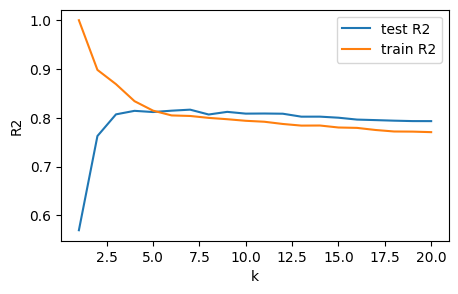

In [45]:
plt.figure(figsize=(5, 3))
plt.plot(k_values, precisions_test, label="test R2")
plt.plot(k_values, precisions_train, label="train R2")
plt.ylabel("R2")
plt.xlabel("k")
plt.legend()
plt.show()

Para determinar el número óptimo de vecinos en el algoritmo kNN para regresión, se entrenaron modelos para valores de k entre 1 y 20.
Se generó una gráfica que relaciona el valor de k con el coeficiente de determinación $R^2$, utilizado como medida de precisión del modelo.
A partir de la gráfica, se observa que el valor de k = 6 maximiza el desempeño del modelo en el conjunto de prueba, por lo que se selecciona como el número óptimo de vecinos.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [50]:
modelo = KNeighborsRegressor(n_neighbors=6)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio:", mse)
print("Raíz del Error Cuadrático Medio:", rmse)
print("R2 en test:", r2)

Error Cuadrático Medio: 1123687472.410959
Raíz del Error Cuadrático Medio: 33521.44794621735
R2 en test: 0.8146213996457848


El modelo kNN de regresión fue entrenado utilizando el valor óptimo de vecinos k=6.
Al evaluarlo sobre el conjunto de prueba, se obtuvo un Error Cuadrático Medio (MSE) de 1123687472.410959, lo que refleja la magnitud del error cuadrático promedio del modelo.
La Raíz del Error Cuadrático Medio (RMSE) fue de aproximadamente  33521.44794621735, indicando que el modelo presenta, en promedio, un error de alrededor de 33 mil unidades monetarias en la predicción del precio de las viviendas.
Adicionalmente, el coeficiente de determinación $R^2$ = 0.815 sugiere que el modelo explica el 81.5% de la variabilidad del precio, evidenciando un desempeño adecuado para el problema de regresión planteado